# Machine Learning - Process


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Classification

### k-Nearest Neighbors: Fit

In [2]:
df = pd.read_csv('house-votes-84.csv', names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])
df.replace({'n': 0, 'y': 1, '?': 0}, inplace = True)
df.tail()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
430,republican,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,republican,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,republican,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1
434,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,0


In [3]:
df.shape

(435, 17)

In [4]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict

In [5]:
X_new = np.empty(16)
category = [0,1]
for i in range(16):
    X_new[i] = np.random.choice(category)
X_new = X_new.reshape(1,-1)
X_new

array([[1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.]])

In [6]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis = 1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new

new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['republican']


### The digits recognition dataset

In [7]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys of the dataset
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [9]:
# Print the shape of the images and data keys
print(digits.images.shape, digits.data.shape)

(1797, 8, 8) (1797, 64)


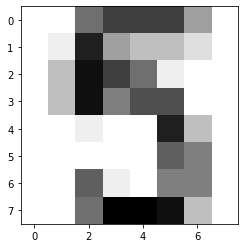

In [10]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

In [11]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9902574808629089
0.9833333333333333


### Overfitting and underfitting

In [12]:
neighbors = np.arange(1, 9)
list(enumerate(neighbors))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]

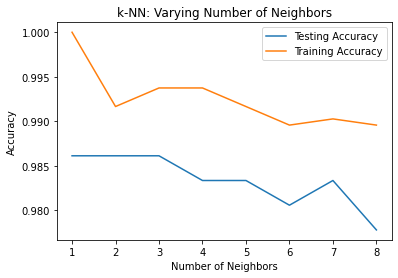

In [13]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Regression

### Importing data for supervised learning

In [14]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')
# Create arrays for features and target variable
y = df['life'].values
X= df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))
df

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


### Fit & predict for regression

0.6192442167740035


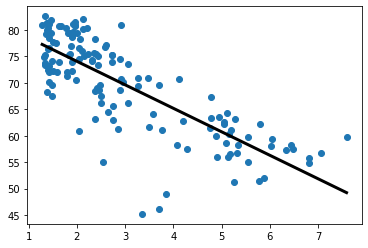

In [16]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X, y)

### Train/test split for regression

In [19]:
X = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP','BMI_female', 'child_mortality']].values
y = df['life'].values.reshape(-1, 1)

In [20]:
9# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213


### 5-fold cross-validation

In [19]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793578


### K-Fold CV comparison

In [20]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.8718712782622234
0.843612862013124


## Fine-tuning your model

### Metrics for classification

In [21]:
df = pd.read_csv('diabetes.csv')
y = df['diabetes'].values
X = df.drop('diabetes', axis = 1).values
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.4)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



### Building a logistic regression model

In [23]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(solver = 'liblinear')

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



### Plotting an ROC curve

Text(0.5, 1.0, 'ROC Curve')

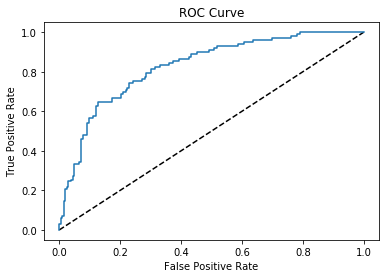

In [24]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

### AUC computation

In [25]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8269084332762232
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81981481 0.86622642 0.85037736]


### Hyperparameter tuning with GridSearchCV

In [26]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver = 'liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid, cv = 5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7721925133689839
